In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

In [74]:
!pip install roboflow

In [75]:
from roboflow import Roboflow

In [76]:
rf = Roboflow(api_key="nh1Z0MN02Pb7vUwCfz4O")
project = rf.workspace("ali-rostami").project("labeled-mri-brain-tumor-dataset")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [77]:
!pip install ultralytics

In [29]:
from ultralytics import YOLO

In [26]:
# Load a model
model = YOLO("yolov8n.pt")

In [34]:
yaml_path="Labeled-MRI-Brain-Tumor-Dataset-1/data.yaml"

In [6]:
train_results = model.train(
    data=yaml_path,
    epochs=100,          # number of epochs
    imgsz=640,           # training image size
    device="cpu",  # device to run on
    patience=10,          # stop after no improvement in 3 epochs
    optimizer="Adam",    # optimizer choice (default is Adam)
    lr0=0.00001,         # learning rate
    lrf=0.01,            # final learning rate multiplier
)

Ultralytics 8.3.49 🚀 Python-3.10.6 torch-2.5.1+cu124 CPU (Intel Core(TM) i7-6700 3.40GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Labeled-MRI-Brain-Tumor-Dataset-1/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train60, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

KeyboardInterrupt: 

In [36]:
# Set up directories for saving the model and TensorBoard logs
checkpoint_dir = './checkpoints'

os.makedirs(checkpoint_dir, exist_ok=True)

In [69]:
# Load the best model
yolo_model_path = os.path.join(checkpoint_dir, 'yolo8_model.pt')
yolo_model_path

'./checkpoints/yolo8_model.pt'

In [70]:
# Load the trained model
model = YOLO(yolo_model_path)

In [71]:
# Evaluate the model on the test set defined in the YAML
results = model.val(data=yaml_path, split="test", device="cpu")

Ultralytics 8.3.49 🚀 Python-3.10.6 torch-2.5.1+cu124 CPU (Intel Core(TM) i7-6700 3.40GHz)


val: Scanning /home/gokhan/code/joelbrice/brainmap/notebooks/Labeled-MRI-Brain-Tumor-Dataset-1/test/labels.cache... 246 images, 0 backgrounds, 0 corrupt: 100%|██████████| 246/246 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]


                   all        246        250      0.949      0.924      0.974      0.627
                Glioma         80         84      0.975      0.936      0.982      0.691
            Meningioma         63         63      0.983      0.926      0.988      0.596
              No Tumor         49         49      0.893      0.878       0.96      0.724
             Pituitary         54         54      0.945      0.957      0.967      0.497
Speed: 1.9ms preprocess, 97.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/gokhan/.pyenv/runs/detect/val4


In [72]:
# Access the results_dict from the results object
results_dict = results.results_dict
print(results_dict)  # To see the structure of the metrics

{'metrics/precision(B)': 0.9491825686018822, 'metrics/recall(B)': 0.9241883102906003, 'metrics/mAP50(B)': 0.9743807772600006, 'metrics/mAP50-95(B)': 0.6268306222966961, 'fitness': 0.6615856377930266}


In [73]:

# Specific metrics
precision = results_dict.get('metrics/precision(B)', None)
recall = results_dict.get('metrics/recall(B)', None)
mAP50 = results_dict.get('metrics/mAP50(B)', None)
mAP50_95 = results_dict.get('metrics/mAP50-95(B)', None)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP50: {mAP50}")
print(f"mAP50-95: {mAP50_95}")

Precision: 0.9491825686018822
Recall: 0.9241883102906003
mAP50: 0.9743807772600006
mAP50-95: 0.6268306222966961


In [79]:
import glob
import cv2
import matplotlib.pyplot as plt

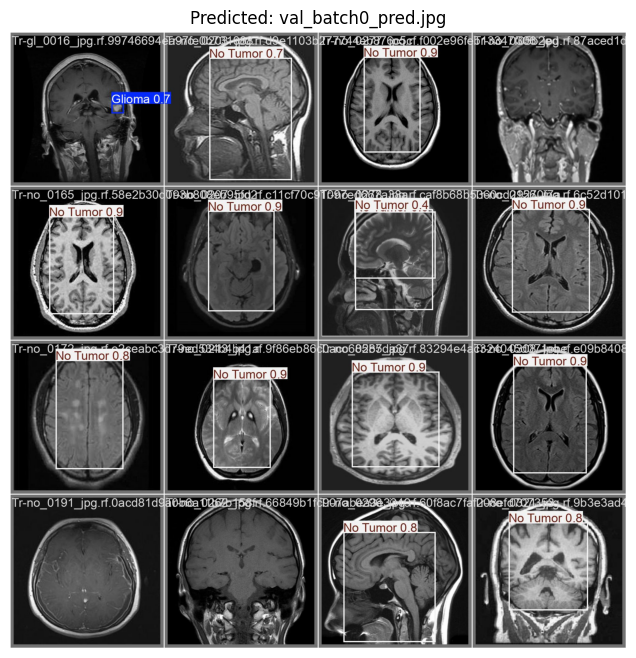

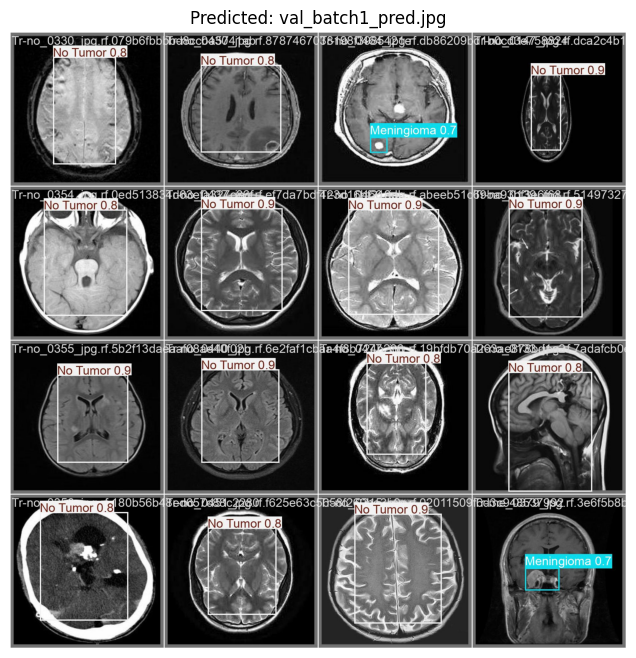

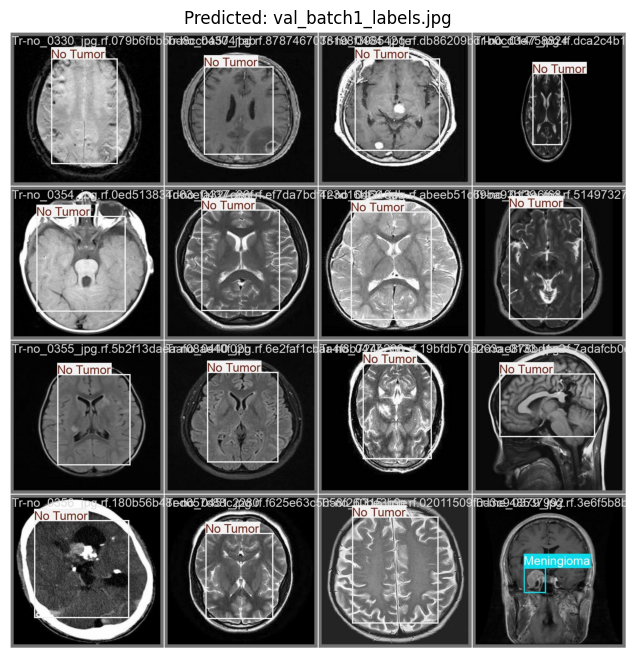

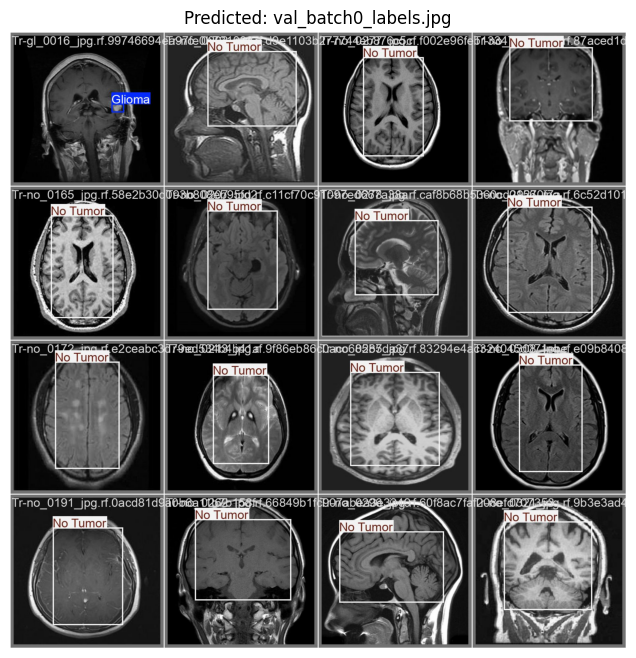

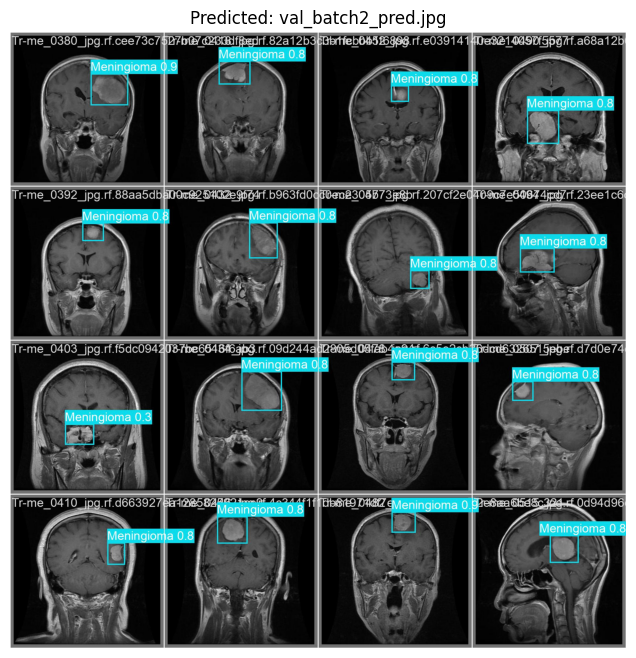

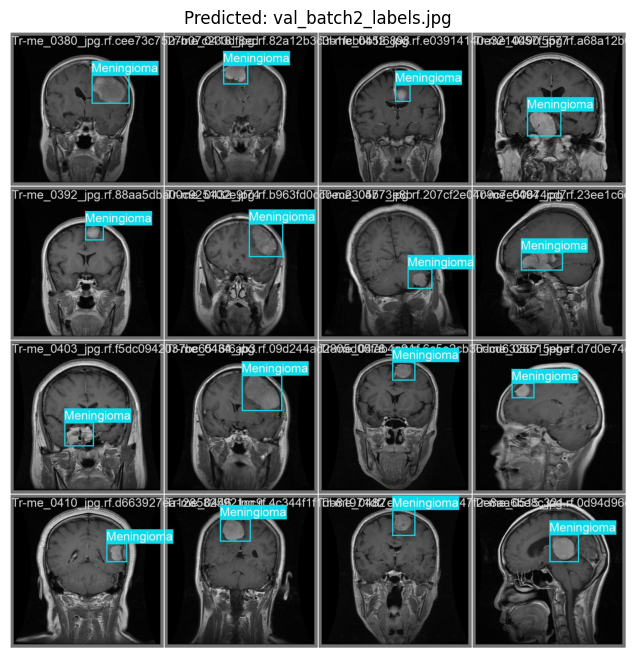

In [82]:
# Path to directory with saved images
results_path = results.save_dir

# Display a few predictions
predicted_images = glob.glob(os.path.join(results_path, '*.jpg'))

for img_path in predicted_images[:16]:  # Limit to first 5 images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {os.path.basename(img_path)}")
    plt.show()

In [66]:
%matplotlib inline
import random

In [44]:
test_dir = "Labeled-MRI-Brain-Tumor-Dataset-1/test/images"

In [61]:
# Random image selection for prediction

# Get the list of all image files in the directory
image_files = os.listdir(test_dir)

# Select a random image
random_image = random.choice(image_files)
random_image_path = os.path.join(test_dir, random_image)

In [62]:
# Run predictions on the selected image
prediction = model.predict(source=random_image_path)

# Display the results (if applicable)
prediction[0].show()


image 1/1 /home/gokhan/code/joelbrice/brainmap/notebooks/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-me_0452_jpg.rf.e03914140e3214057f5577735cd20a73.jpg: 640x640 1 Meningioma, 182.9ms
Speed: 1.9ms preprocess, 182.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
